In [35]:
from IMPORTS import *
import fasttext
import fasttext.util

seed_value = 16
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

Reading ATE json files

In [9]:
ATE_train = None
ATE_test = None
ATE_val = None
with open("Task1\processed\ATE_train.json") as f1:
    ATE_train  = json.load(f1)

with open("Task1\processed\ATE_test.json") as f2:
    ATE_test = json.load(f2)

with open("Task1\processed\ATE_val.json") as f3:
    ATE_val = json.load(f3)

Reading NER json files

In [10]:
NER_train = None
NER_test = None
NER_val = None
with open("Task1\processed\\NER_train.json") as f1:
    NER_train  = json.load(f1)

with open("Task1\processed\\NER_test.json") as f2:
    NER_test = json.load(f2)

with open("Task1\processed\\NER_val.json") as f3:
    NER_val = json.load(f3)

Loading the pre-trained models (Word2Vec, GloVE and fasttext)

In [12]:
word2vec = KeyedVectors.load_word2vec_format('WordEmbeddings/Word2Vec.bin',binary=True)
ft = fasttext.load_model('WordEmbeddings/cc.en.300.bin')

ATE Dataset

In [13]:
X_train_ate,Y_train_ate= create_train_test_val(ATE_train)
X_test_ate,Y_test_ate = create_train_test_val(ATE_test)
X_val_ate,Y_val_ate = create_train_test_val(ATE_val)

NER Dataset

In [14]:
X_train_ner,Y_train_ner = create_train_test_val(NER_train)
X_test_ner,Y_test_ner = create_train_test_val(NER_test)
X_val_ner,Y_val_ner = create_train_test_val(NER_val)

Tokenizing the ATE Dataset

In [15]:
X_train_ate_tokenized, toke = TokenCreator(X_train_ate,1)
X_test_ate_tokenized = TokenCreator(X_test_ate,0,tokenizer = toke)
X_val_ate_tokenized = TokenCreator(X_val_ate,0,tokenizer = toke)

Y_train_ate_tokenized,toke2 = TokenCreator(Y_train_ate,0)
Y_test_ate_tokenized = TokenCreator(Y_test_ate,0,tokenizer = toke2)
Y_val_ate_tokenized = TokenCreator(Y_val_ate,0,tokenizer = toke2)

Tokenizing the NER Dataset

In [16]:
X_train_ner_tokenized, toke = TokenCreator(X_train_ner,1)
X_test_ner_tokenized = TokenCreator(X_test_ner,0,tokenizer = toke)
X_val_ner_tokenized = TokenCreator(X_val_ner,0,tokenizer = toke)

Y_train_ner_tokenized,toke2 = TokenCreator(Y_train_ner,0)
Y_test_ner_tokenized = TokenCreator(Y_test_ner,0,tokenizer = toke2)
Y_val_ner_tokenized = TokenCreator(Y_val_ner,0,tokenizer = toke2)

Vocabulary of ATE

In [17]:
st1 = find_vocab(X_train_ate_tokenized)
vocab_size_ate  = len(st1) + 1 
vocab_size_ate

2406

Vocabulary of NER

In [18]:
st2 = find_vocab(X_train_ner_tokenized)
vocab_size_ner = len(st2) + 1
vocab_size_ner

30220

Padding ATE

In [19]:
X_padded_train = pad_sequences(X_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_train = pad_sequences(Y_train_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_test = pad_sequences(X_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_test = pad_sequences(Y_test_ate_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_val = pad_sequences(X_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_val = pad_sequences(Y_val_ate_tokenized, maxlen=100, padding="pre", truncating="post")

Padding NER

In [20]:
X_padded_train_ner = pad_sequences(X_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_train_ner = pad_sequences(Y_train_ner_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_test_ner = pad_sequences(X_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_test_ner = pad_sequences(Y_test_ner_tokenized, maxlen=100, padding="pre", truncating="post")

X_padded_val_ner = pad_sequences(X_val_ner_tokenized, maxlen=100, padding="pre", truncating="post")
Y_padded_val_ner = pad_sequences(Y_val_ner_tokenized, maxlen=100, padding="pre", truncating="post") 

One hot encoding the ATE labels

In [21]:
Y_padded_train = to_categorical(Y_padded_train)
Y_padded_test = to_categorical(Y_padded_test)
Y_padded_val = to_categorical(Y_padded_val)

One hot encoding the NER labels

In [22]:
Y_padded_train_ner = to_categorical(Y_padded_train_ner)
Y_padded_test_ner = to_categorical(Y_padded_test_ner)
Y_padded_val_ner = to_categorical(Y_padded_val_ner)

Assigning ATE Word2Vec mapping

In [23]:
weights_ate_ft = np.zeros((vocab_size_ate, 300))

mapping_ate_ft = toke.word_index 
mapping_ate_ft

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

In [24]:
weights_ate_word2vec = np.zeros((vocab_size_ate, 300))

mapping_ate_word2vec = toke.word_index 
mapping_ate_word2vec

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

Assigning NER Word2Vec mapping

In [25]:
weights_ner_word2vec = np.zeros((vocab_size_ner, 300))

mapping_ner_word2vec = toke.word_index 
mapping_ner_word2vec

{'#UK': 1,
 'the': 2,
 'of': 3,
 'in': 4,
 'to': 5,
 'and': 6,
 'that': 7,
 'a': 8,
 'was': 9,
 'is': 10,
 'by': 11,
 'on': 12,
 'as': 13,
 'for': 14,
 'be': 15,
 'it': 16,
 'court': 17,
 'not': 18,
 'has': 19,
 'under': 20,
 'this': 21,
 'section': 22,
 'which': 23,
 'with': 24,
 'or': 25,
 'at': 26,
 'he': 27,
 'case': 28,
 'no.': 29,
 'from': 30,
 'been': 31,
 'his': 32,
 'an': 33,
 'had': 34,
 'are': 35,
 'were': 36,
 'v.': 37,
 'state': 38,
 'also': 39,
 'have': 40,
 'act': 41,
 'order': 42,
 'any': 43,
 'no': 44,
 'high': 45,
 'accused': 46,
 'learned': 47,
 'said': 48,
 'there': 49,
 'dated': 50,
 'supreme': 51,
 'made': 52,
 'would': 53,
 'before': 54,
 'singh': 55,
 'held': 56,
 'who': 57,
 'such': 58,
 'against': 59,
 'other': 60,
 'but': 61,
 'their': 62,
 'one': 63,
 'if': 64,
 'respondent': 65,
 'filed': 66,
 'appeal': 67,
 'appellant': 68,
 'evidence': 69,
 '&': 70,
 'all': 71,
 'only': 72,
 'decision': 73,
 'after': 74,
 'we': 75,
 'they': 76,
 'petitioner': 77,
 'govern

In [26]:
for word, index in mapping_ate_ft.items():
    if word in ft:
        weights_ate_ft[index:] = ft[word]

Fetching weights from pre trained Word2Vec model (ATE)

In [ ]:
for word, index in mapping_ate_word2vec.items():
    if word in word2vec:
        weights_ate_word2vec[index:] = word2vec[word]

Fetching weights from pre trained Word2Vec model (NER)

In [ ]:
for word, index in mapping_ner_word2vec.items():
    if word in word2vec:
        weights_ner_word2vec[index:] = word2vec[word]

Initializing the LSTM Model

In [27]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = vocab_size_ate,output_dim = 300,input_length  = 100,weights = [weights_ate_ft],trainable = False))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(Y_padded_train.shape[2], activation='softmax')))

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = vocab_size_ate,output_dim = 300,input_length  = 100,weights = [weights_ate_word2vec],trainable = False))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(TimeDistributed(Dense(Y_padded_train.shape[2], activation='softmax')))

Compiling the LSTM Model

In [28]:
lstm_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc',Precision(),Recall()])

In [29]:
LSTM_f1_callback_val = F1ScoreCallback(data=(X_padded_val, Y_padded_val),name='validation')
LSTM_f1_callback_train=F1ScoreCallback(data=(X_padded_train, Y_padded_train),name='training')

In [30]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          721800    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           93440     
                                                                 
 time_distributed (TimeDist  (None, 100, 4)            260       
 ributed)                                                        
                                                                 
Total params: 815500 (3.11 MB)
Trainable params: 93700 (366.02 KB)
Non-trainable params: 721800 (2.75 MB)
_________________________________________________________________


Fitting the LSTM model

In [31]:
lstm_training = lstm_model.fit(X_padded_train, Y_padded_train, batch_size=128, epochs=15, validation_data=(X_padded_val, Y_padded_val), callbacks=[LSTM_f1_callback_train,LSTM_f1_callback_val])

Epoch 1/15


29/29 [==============================] - 1s 15ms/step: 1.3146 - acc: 0.9756 - precision: 0.9365 - rec
training F1 Score: 0.8143429756164551
7/7 [==============================] - 0s 12ms/step
validation F1 Score: 0.858208417892456
8/8 [==============================] - 7s 484ms/step - loss: 1.3137 - acc: 0.9757 - precision: 0.9374 - recall: 0.0108 - val_loss: 1.2174 - val_acc: 0.9786 - val_precision: 0.9235 - val_recall: 0.0975
Epoch 2/15
29/29 [==============================] - 0s 14ms/step: 1.1535 - acc: 0.9771 - precision: 0.9132 
training F1 Score: 0.7882933020591736
7/7 [==============================] - 0s 16ms/step
validation F1 Score: 0.8195436000823975
8/8 [==============================] - 3s 354ms/step - loss: 1.1521 - acc: 0.9771 - precision: 0.9133 - recall: 0.1282 - val_loss: 1.0297 - val_acc: 0.9726 - val_precision: 0.9119 - val_recall: 0.1437
Epoch 3/15
29/29 [==============================] - 0s 14ms/step: 0.8423 - acc: 0.9524 - precision: 0.9156 - 
traini

Testing accuracy

In [32]:
accuracy = lstm_model.evaluate(X_padded_test, Y_padded_test, verbose = 1)
print(accuracy[1])

11/11 [==============================] - 0s 13ms/step - loss: 0.1638 - acc: 0.9683 - precision: 0.9682 - recall: 0.9380
0.9682926535606384


Plotting the graph

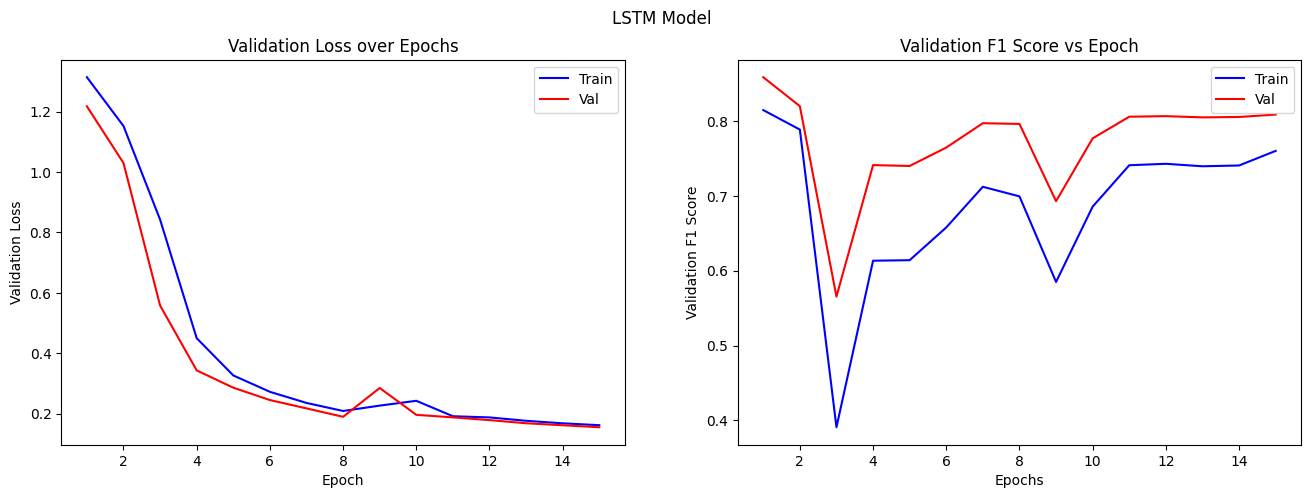

In [33]:
draw_loss_graph(lstm_training, "LSTM Model", LSTM_f1_callback_train.f1_scores, LSTM_f1_callback_val.f1_scores)
save_model(lstm_model, "LSTM","Word2Vec","t2")
loaded_model = load_model("Saved_Models/t2_LSTM_Word2Vec.pkl")

In [36]:
Y_pred = lstm_model.predict(X_padded_test)
real = get_real(Y_padded_test)
pred = get_pred(Y_pred)
f1 = F1Score(average='macro')
f1.update_state(real,pred)
f1_score = f1.result().numpy()
print(f"F1 Score NER : {f1_score}")

11/11 [==============================] - 0s 12ms/step


NameError: name 'get_real' is not defined